# CNN(畳み込みニューラルネットワーク)によるCIFAR10 分類

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
nb_classes = 10
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
print(y_train.shape)


(50000, 10)


In [4]:
x_train = x_train/255.0
x_test = x_test/255.0

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

nb_classes=10


# tensorboard 設定
import keras.callbacks
import keras.backend.tensorflow_backend as KTF
import tensorflow as tf

old_session = KTF.get_session()

session = tf.Session('')
KTF.set_session(session)
KTF.set_learning_phase(1)

# CNNを構築
model = Sequential()

# conv 3*3 -> 32 channels

model.add(Conv2D( _ , ( _ ,  _ ), padding='same', input_shape=x_train.shape[1:]))

model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
# Max pooling 2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 全結合 512
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 全結合 10
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

tb_cb = keras.callbacks.TensorBoard(log_dir="./tflog/", histogram_freq=1, write_images=True)
cbks = [tb_cb]

model.compile(loss='categorical_crossentropy', # 損失関数の設定　URL
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


NameError: name 'x_train' is not defined

## データオーギュメンテーション

In [67]:
train_datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=False,
        zoom_range=[.8, 1])
#         channel_shift_range=30,
#         fill_mode='reflect')

train_generator = train_datagen.flow(x_train, y_train, batch_size=100, seed = 13)
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow(x_test, y_test, batch_size=100, seed = 13)

In [ ]:
# augmentation 用
batch_size = 1000
nb_epoch = 50
history = model.fit_generator(train_generator,
                    steps_per_epoch=500,
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=800,
                    verbose=1)

Epoch 1/10
500/500 [==============================] - 465s - loss: 1.8921 - acc: 0.2716 - val_loss: 1.5000 - val_acc: 0.4483
Epoch 2/10
500/500 [==============================] - 465s - loss: 1.5615 - acc: 0.4206 - val_loss: 1.3030 - val_acc: 0.5377
Epoch 3/10
500/500 [==============================] - 471s - loss: 1.3855 - acc: 0.4953 - val_loss: 1.0972 - val_acc: 0.5984
Epoch 4/10
500/500 [==============================] - 468s - loss: 1.2800 - acc: 0.5402 - val_loss: 0.9986 - val_acc: 0.6390
Epoch 5/10
500/500 [==============================] - 457s - loss: 1.2042 - acc: 0.5692 - val_loss: 0.9754 - val_acc: 0.6501
Epoch 6/10
500/500 [==============================] - 458s - loss: 1.1485 - acc: 0.5917 - val_loss: 0.9083 - val_acc: 0.6765
Epoch 7/10
500/500 [==============================] - 458s - loss: 1.1060 - acc: 0.6099 - val_loss: 0.9456 - val_acc: 0.6690
Epoch 8/10
500/500 [==============================] - 458s - loss: 1.0712 - acc: 0.6217 - val_loss: 0.8274 - val_acc: 0.7092


In [8]:
batch_size = 1000
nb_epoch = 10

history = model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=nb_epoch,
                            verbose=1,
                            validation_data=(x_test, y_test),
                            shuffle=True,callbacks=cbks)

### add for TensorBoard
KTF.set_session(old_session)

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
49000/50000 [============================>.] - ETA: 3s - loss: 1.9041 - acc: 0.3087

InvalidArgumentError: You must feed a value for placeholder tensor 'conv2d_1_input' with dtype float and shape [?,32,32,3]
	 [[Node: conv2d_1_input = Placeholder[dtype=DT_FLOAT, shape=[?,32,32,3], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'conv2d_1_input', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-51503e25b2a7>", line 29, in <module>
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
  File "/usr/lib/python3.6/site-packages/keras/models.py", line 432, in add
    dtype=layer.dtype, name=layer.name + '_input')
  File "/usr/lib/python3.6/site-packages/keras/engine/topology.py", line 1426, in Input
    input_tensor=tensor)
  File "/usr/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 87, in wrapper
    return func(*args, **kwargs)
  File "/usr/lib/python3.6/site-packages/keras/engine/topology.py", line 1337, in __init__
    name=self.name)
  File "/usr/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 432, in placeholder
    x = tf.placeholder(dtype, shape=shape, name=name)
  File "/usr/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1548, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/usr/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2094, in _placeholder
    name=name)
  File "/usr/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/usr/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'conv2d_1_input' with dtype float and shape [?,32,32,3]
	 [[Node: conv2d_1_input = Placeholder[dtype=DT_FLOAT, shape=[?,32,32,3], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [40]:
loss, acc = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', loss)
print('Test acc:', acc)

10000/10000 [==============================] - 13s    
Test loss: 0.558366044044
Test acc: 0.817


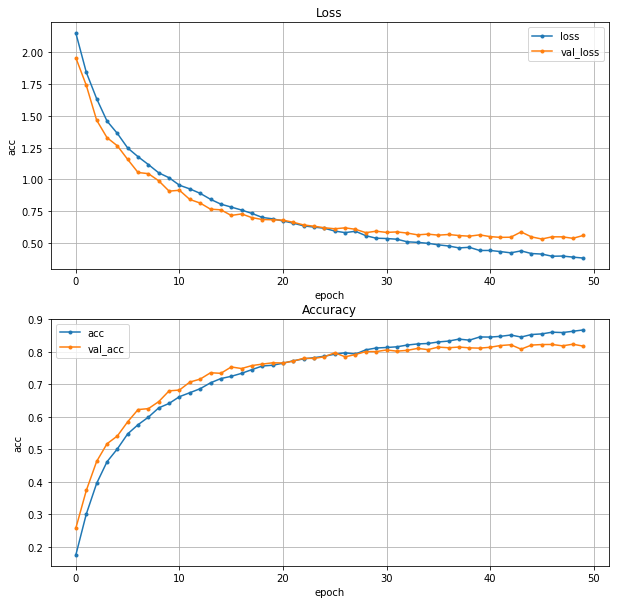

In [41]:
# 学習の様子をプロット
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Loss')
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

# plt.savefig('rms_cifar3_50epochs.png')

(1, 32, 32, 3)


NameError: name 'model' is not defined

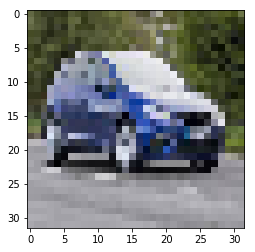

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#Jupyterでインライン表示するための宣言
%matplotlib inline 

#画像の読み込み
test = Image.open("./car1.jpg")


# gray_img = im.convert('L')
test = test.resize((32,32))
plt.imshow(test)

# #画像をarrayに変換
test_array = np.array(test, 'f')
test_array /= 255.
test_array = test_array[np.newaxis]
print(test_array.shape)

# im_list = 1 - im_list/256

res = np.argmax(model.predict(test_array)[0])
# l_dict = {e:i.decode('utf-8') for e,i in enumerate(label_names)}

print(model.predict(test_array),'\n',select_labels[res])